   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

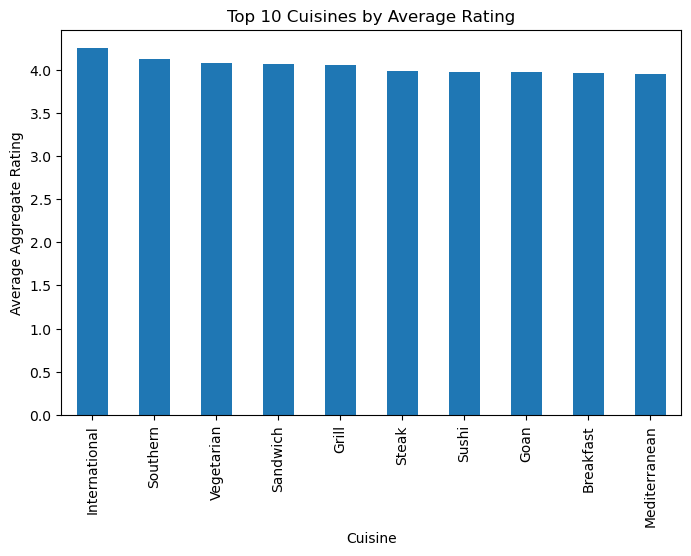

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/asus/OneDrive/Desktop/Machine learning/Sakshi Gurule (Data Science)/Dataset .csv')
head=df.head() # in this I have cheked for the first 5 rows of the dataset
print(head)
df.columns
# Analyze the relationship between the type of cuisine and the restaurant's rating.
# Identify the most popular cuisines among customers based on the number of votes.
# Determine if there are any specific cuisines that tend to receive higher ratings.
# Step 1: Split multiple cuisines into single rows
df_cuisine = df.copy()
df_cuisine['Cuisines'] = df_cuisine['Cuisines'].str.split(', ')
df_cuisine = df_cuisine.explode('Cuisines')
# Step 2: Cuisine vs average rating
avg_rating_cuisine = (df_cuisine.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False))
avg_rating_cuisine.head(10)
# Step 3: Most popular cuisines (based on votes)
popular_cuisines = (df_cuisine.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False))
popular_cuisines.head(10)
# Step 4: High-rated cuisines with 20 restaurants
cuisine_stats = df_cuisine.groupby('Cuisines').agg(Avg_Rating=('Aggregate rating', 'mean'),Restaurant_Count=('Restaurant ID', 'count'))
top_rated_cuisines = cuisine_stats[cuisine_stats['Restaurant_Count'] >= 20].sort_values(by='Avg_Rating', ascending=False)
top_rated_cuisines.head(10)
#PLotes the graph for better visualization with 10 restaurants
top_rated_cuisines.head(10)['Avg_Rating'].plot(kind='bar',figsize=(8,5))
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Cuisine')
plt.ylabel('Average Aggregate Rating')
plt.show()
